In [79]:
using Revise
using Turing
using LinearAlgebra
using Distributions
using Random
using StatsPlots


In [2]:
includet("turing_nw_bvar.jl")

In [76]:

# Set random seed for reproducibility
Random.seed!(123)

# Function to generate synthetic multivariate normal time series data
function generate_mvnormal_data(T, K, mu_true, Sigma_true)
    Y = zeros(T, K)
    for t in 1:T
        Y[t, :] = rand(MvNormal(mu_true, Sigma_true))
    end
    return Y
end

# Simulate data
K = 3  # Number of variables
T = 100  # Time points
mu_true = [.08, .07, .01] # True mean
L_true = cholesky([1. 0.3; 0.3 0.1]) 
corrm = [1. .8 0.3; .8  1. 0.3; 0.3 0.3 1.]
sigmas = [.16, .16, .04]# Cholesky factor
Sigma_true = sigmas' * corrm * sigmas  # True covariance
Y = generate_mvnormal_data(T, K, mu_true, Sigma_true)

model = mv_model(Y)
#chain = sample(model, Prior(), 1000)
chain = sample(model, NUTS(), 1000)

#= # Instantiate the model
model = mvnormal_lkjcholesky_model(Y, K, T)

# Sample from the posterior
chain = sample(model, NUTS(), 1000)
 =#
# Summarize results
display(summarystats(chain))
display(quantile(chain))

Sampling   0%|█                                         |  ETA: N/A
┌ Info: Found initial step size
│   ϵ = 0.05
└ @ Turing.Inference C:\Users\matsz\.julia\packages\Turing\GSvwQ\src\mcmc\hmc.jl:213
Sampling   0%|█                                         |  ETA: 0:00:11
Sampling   1%|█                                         |  ETA: 0:00:07
Sampling   1%|█                                         |  ETA: 0:00:06
Sampling   2%|█                                         |  ETA: 0:00:08
Sampling   2%|█                                         |  ETA: 0:00:08
Sampling   3%|██                                        |  ETA: 0:00:07
Sampling   3%|██                                        |  ETA: 0:00:06
Sampling   4%|██                                        |  ETA: 0:00:06
Sampling   4%|██                                        |  ETA: 0:00:06
Sampling   5%|██                                        |  ETA: 0:00:06
Sampling   5%|███                                       |  ETA: 0:00:06
Sampling  

Summary Statistics
  parameters      mean       std      mcse    ess_bulk   ess_tail      rhat    ⋯
      Symbol   Float64   Float64   Float64     Float64    Float64   Float64    ⋯

        μ[1]    0.0794    0.0110    0.0003   1341.0429   793.7613    0.9996    ⋯
        μ[2]    0.0675    0.0109    0.0003   1191.1945   778.7636    1.0003    ⋯
        μ[3]    0.0013    0.0097    0.0003   1131.2293   762.6804    1.0021    ⋯
     Σ[1, 1]    0.0113    0.0012    0.0000   1409.6856   763.2700    1.0001    ⋯
     Σ[2, 1]   -0.0008    0.0008    0.0000   1208.9574   743.4487    1.0002    ⋯
     Σ[3, 1]   -0.0001    0.0007    0.0000   1791.4438   850.2959    1.0034    ⋯
     Σ[1, 2]   -0.0008    0.0008    0.0000   1208.9574   743.4487    1.0002    ⋯
     Σ[2, 2]    0.0109    0.0011    0.0000   1308.7491   848.7930    0.9991    ⋯
     Σ[3, 2]   -0.0002    0.0008    0.0000   1246.9436   696.6958    1.0025    ⋯
     Σ[1, 3]   -0.0001    0.0007    0.0000   1791.4438   850.2959    1.0034    ⋯
     Σ[2

Quantiles
  parameters      2.5%     25.0%     50.0%     75.0%     97.5% 
      Symbol   Float64   Float64   Float64   Float64   Float64 

        μ[1]    0.0576    0.0718    0.0795    0.0867    0.1007
        μ[2]    0.0468    0.0601    0.0675    0.0746    0.0899
        μ[3]   -0.0187   -0.0051    0.0014    0.0080    0.0204
     Σ[1, 1]    0.0093    0.0105    0.0112    0.0120    0.0139
     Σ[2, 1]   -0.0025   -0.0014   -0.0008   -0.0003    0.0008
     Σ[3, 1]   -0.0016   -0.0006   -0.0001    0.0004    0.0013
     Σ[1, 2]   -0.0025   -0.0014   -0.0008   -0.0003    0.0008
     Σ[2, 2]    0.0090    0.0101    0.0108    0.0117    0.0133
     Σ[3, 2]   -0.0017   -0.0007   -0.0002    0.0004    0.0013
     Σ[1, 3]   -0.0016   -0.0006   -0.0001    0.0004    0.0013
     Σ[2, 3]   -0.0017   -0.0007   -0.0002    0.0004    0.0013
     Σ[3, 3]    0.0082    0.0093    0.0099    0.0105    0.0121


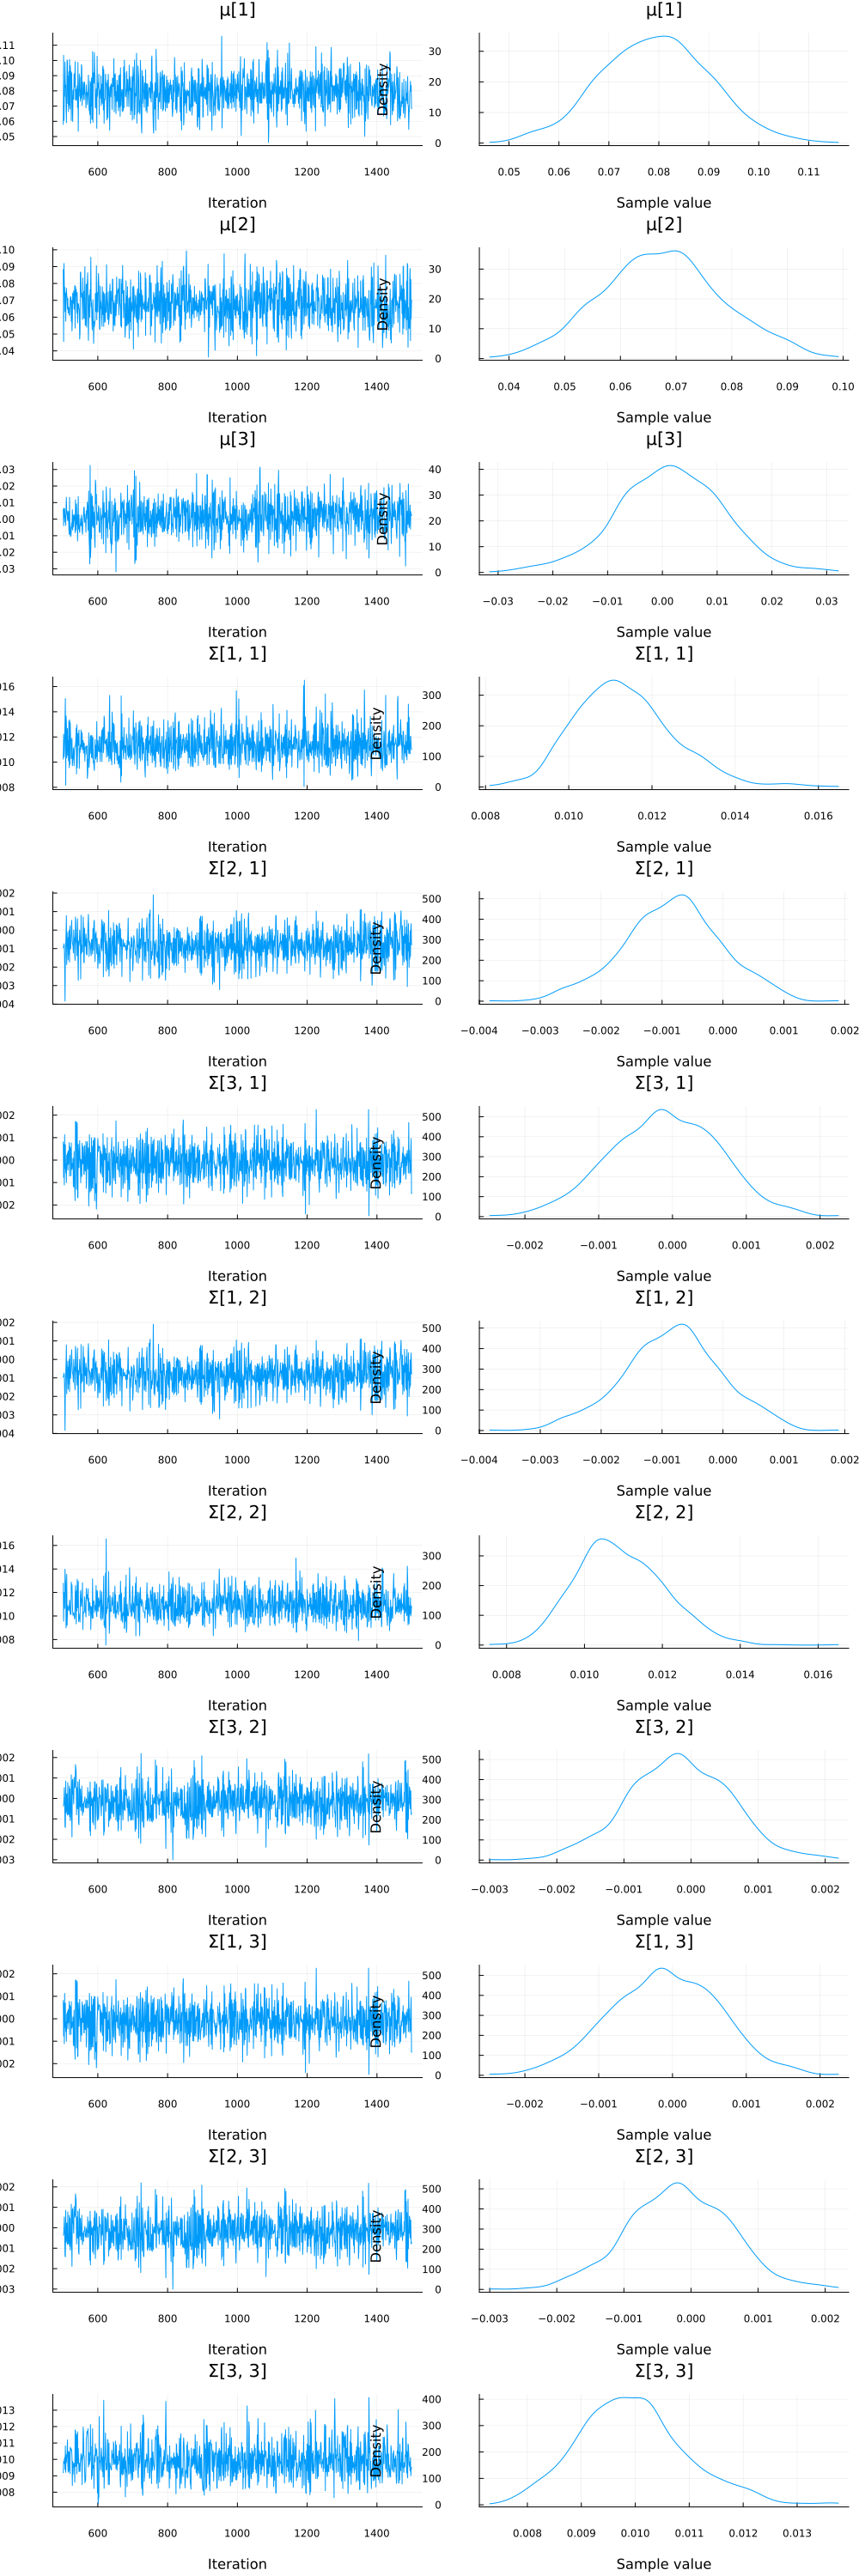

In [80]:
plot(chain)

In [93]:
n_samples = 1000
Y_sim  = zeros(n_samples,3)

for s in 1:n_samples
    μ = vec(group(chain, :μ)[s,:,:].value.data)
    Σ = reshape(group(chain, :Σ)[s,:,:].value.data, 3, 3)
    Y_sim[s,:] = rand(MvNormal(μ, Σ))
end


In [91]:
quantile(Y_sim[:,1], [.025, .25, .5, .75, .975])

5-element Vector{Float64}:
 -0.11691036566927075
  0.011683345994794845
  0.08489016970882407
  0.15365362602877297
  0.2946304771179324

In [92]:
Y_true = rand(MvNormal(mu_true, Sigma_true), 1000)
quantile(Y_true, [.025, .25, .5, .75, .975])

5-element Vector{Float64}:
 -0.15254075188777547
 -0.017874915791140367
  0.05607904154793979
  0.1307437436848801
  0.2612819656729717

In [24]:
x = get(chain, Symbol("μ[1]"))
x.var"μ[1]"[3]

0.07798692084658243

In [47]:
names = namesingroup(chain, "μ")
x = get(chain, names)

values(x)[1][:,1]

1-dimensional AxisArray{Float64,1,...} with axes:
    :iter, 1001:1:6000
And data, a 5000-element Vector{Float64}:
 0.0744667696410004
 0.07917748438888234
 0.07798692084658243
 0.07047884619297753
 0.0880750707424866
 0.08380136513072531
 0.09555690977623278
 0.07920284693836772
 0.06770738872270987
 0.08179621884750676
 ⋮
 0.07732560183184299
 0.08672721317161819
 0.09491339856932118
 0.08680059895298932
 0.09387790900790398
 0.06931014289764934
 0.06931014289764934
 0.09061132661145184
 0.08792038569857295

In [132]:
# Example Usage:
# Generate some sample data
T = 100  # Number of time points
n = 2    # Number of variables
p = 2    # Number of lags
k = 1    # Number of exogenous variables

# True parameters (for simulation)
true_β_var = [0.5 0.1 -0.2 0.8; 0.3 -0.1 0.2 0.4]
true_β_exo = [0.7; -0.5]
true_β = hcat(true_β_var, true_β_exo)
true_Ω = [1.0 0.2; 0.2 1.5]

Egzog = randn(T, k)
Y = zeros(T, n)
Y[1:p, :] = randn(p, n) # Initialize with random values

for t in (p + 1):T
    Y_lagged = vec(Y[t-p:t-1, :])
    predictors = vcat(Y_lagged, Egzog[t, :])
    Y[t, :] = true_β * predictors + rand(MvNormal(zeros(n), true_Ω))
end

Y, X = prepare_var_data(Y, p, Egzog, false)


([-1.0697502769254057 -2.7923307316812855; -3.9781499223562817 -1.8487264211162824; … ; -8.675418853997355 -7.089286670537167; -10.359338537886211 -7.443514727657475], [-1.652619035668927 0.20239119466505398 … -0.43190590798099815 -0.6387588595181064; 0.35824505987755584 -0.43190590798099815 … -2.7923307316812855 -0.6434089268476858; … ; -7.566054457310816 -6.930911812056271 … -6.8081555811126595 0.38061829056865776; -7.832823550935287 -6.8081555811126595 … -7.089286670537167 -1.4172018442620187])

In [71]:
mean(Y, dims=1)

1×2 Matrix{Float64}:
 -0.79393  -0.702279

In [84]:
model = mv_model(Y)
#chain = sample(model, Prior(), 1000)
chain = sample(model, NUTS(), 1000)


Sampling   0%|█                                         |  ETA: N/A
┌ Info: Found initial step size
│   ϵ = 0.0125
└ @ Turing.Inference C:\Users\matsz\.julia\packages\Turing\GSvwQ\src\mcmc\hmc.jl:213
Sampling   0%|█                                         |  ETA: 0:03:31
Sampling   1%|█                                         |  ETA: 0:01:46
Sampling   1%|█                                         |  ETA: 0:01:11
Sampling   2%|█                                         |  ETA: 0:00:53
Sampling   2%|█                                         |  ETA: 0:00:43
Sampling   3%|██                                        |  ETA: 0:00:36
Sampling   3%|██                                        |  ETA: 0:00:31
Sampling   4%|██                                        |  ETA: 0:00:27
Sampling   4%|██                                        |  ETA: 0:00:24
Sampling   5%|██                                        |  ETA: 0:00:22
Sampling   5%|███                                       |  ETA: 0:00:20
Sampling

Chains MCMC chain (1000×18×1 Array{Float64, 3}):

Iterations        = 501:1:1500
Number of chains  = 1
Samples per chain = 1000
Wall duration     = 2.5 seconds
Compute duration  = 2.5 seconds
parameters        = μ[1], μ[2], Σ[1, 1], Σ[2, 1], Σ[1, 2], Σ[2, 2]
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size

Summary Statistics
  parameters      mean       std      mcse    ess_bulk   ess_tail      rhat    ⋯
      Symbol   Float64   Float64   Float64     Float64    Float64   Float64    ⋯

        μ[1]    1.5751    0.2143    0.0068    999.7609   745.7052    0.9998    ⋯
        μ[2]    1.0860    0.1691    0.0057    876.9685   559.6982    0.9997    ⋯
     Σ[1, 1]    4.5014    0.4706    0.0139   1166.0311   901.4236    1.0008    ⋯
     Σ[2, 1]    2.3541    0.3138    0.0096   1082.2828   833.7095    1.0001    ⋯
     Σ[1, 2]    2.3541    0.31

In [79]:
display(quantile(chain))

Quantiles
  parameters      2.5%     25.0%     50.0%     75.0%     97.5% 
      Symbol   Float64   Float64   Float64   Float64   Float64 

        μ[1]   -0.8126   -0.8004   -0.7945   -0.7875   -0.7749
        μ[2]   -0.7232   -0.7096   -0.7023   -0.6947   -0.6815
     Σ[1, 1]    0.0079    0.0095    0.0104    0.0114    0.0139
     Σ[2, 1]   -0.0020   -0.0007   -0.0000    0.0007    0.0021
     Σ[1, 2]   -0.0020   -0.0007   -0.0000    0.0007    0.0021
     Σ[2, 2]    0.0080    0.0096    0.0105    0.0114    0.0139


In [129]:
# Sample
model = var_model(Y, X, p, k)
chain = sample(model, Prior(), 1000)

Sampling   0%|█                                         |  ETA: N/A
Sampling   0%|█                                         |  ETA: 0:00:01
Sampling   1%|█                                         |  ETA: 0:00:01
Sampling   2%|█                                         |  ETA: 0:00:01
Sampling   2%|█                                         |  ETA: 0:00:00
Sampling   2%|██                                        |  ETA: 0:00:01
Sampling   3%|██                                        |  ETA: 0:00:00
Sampling   4%|██                                        |  ETA: 0:00:00
Sampling   4%|██                                        |  ETA: 0:00:01
Sampling   4%|██                                        |  ETA: 0:00:01
Sampling   5%|███                                       |  ETA: 0:00:01
Sampling   6%|███                                       |  ETA: 0:00:00
Sampling   6%|███                                       |  ETA: 0:00:01
Sampling   6%|███                                       |  ETA: 0:00

Chains MCMC chain (1000×15×1 Array{Float64, 3}):

Iterations        = 1:1:1000
Number of chains  = 1
Samples per chain = 1000
Wall duration     = 1.28 seconds
Compute duration  = 1.28 seconds
parameters        = μ_β[1], μ_β[2], μ_β[3], μ_β[4], μ_β[5], μ_β[6], μ_β[7], μ_β[8], μ_β[9], μ_β[10], Σ[1, 1], Σ[2, 1], Σ[1, 2], Σ[2, 2]
internals         = lp

Summary Statistics
  parameters      mean       std      mcse    ess_bulk    ess_tail      rhat   ⋯
      Symbol   Float64   Float64   Float64     Float64     Float64   Float64   ⋯

      μ_β[1]    0.0282    5.0326    0.1523   1090.8699   1013.9422    1.0012   ⋯
      μ_β[2]   -0.2214    4.9483    0.1615    935.0248    739.8773    1.0004   ⋯
      μ_β[3]   -0.2805    4.9232    0.1593    958.3265    908.0965    0.9996   ⋯
      μ_β[4]    0.0465    4.9498    0.1658    892.0246    979.7274    1.0006   ⋯
      μ_β[5]   -0.1770    4.9945    0.1745    820.9719    983.4446    0.9997   ⋯
      μ_β[6]    0.2311    5.0491    0.1546   1064.2196    937

In [133]:
# Sample
model = var_model(Y, X, p, k)
chain = sample(model, NUTS(), 1000)

Sampling   0%|█                                         |  ETA: N/A
Sampling 100%|██████████████████████████████████████████| Time: 0:00:00


MethodError: MethodError: no method matching Float64(::ForwardDiff.Dual{ForwardDiff.Tag{DynamicPPL.DynamicPPLTag, Float64}, Float64, 7})
The type `Float64` exists, but no method is defined for this combination of argument types when trying to construct it.

Closest candidates are:
  (::Type{T})(::Real, !Matched::RoundingMode) where T<:AbstractFloat
   @ Base rounding.jl:265
  (::Type{T})(::T) where T<:Number
   @ Core boot.jl:900
  Float64(!Matched::IrrationalConstants.Halfπ)
   @ IrrationalConstants C:\Users\matsz\.julia\packages\IrrationalConstants\lWTip\src\macro.jl:131
  ...
